## Graphing Averages by Trends

In [2]:
import pandas as pd
import os, re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Go through all the relevant csv in summary/ and add the means of each feature to a DataFrame

all_data = pd.DataFrame()
dir = 'summary/'
for file in os.listdir(dir):
    if re.match(r'^summary.\w*.csv$', file):
        name = file.split('.')[1].capitalize()
        if len(name) <= 2:
            name = name.upper()
        path = dir + file
        data = pd.read_csv(path, index_col='Name').mean().to_frame(name = name)
        all_data = pd.concat([all_data, data], axis=1)
all_data

,Austria,France,UK,Denmark,US,Switzerland,Sweden
Number of Edges,63.000000,7841.461538,663.000000,242.615385,101524.666667,1699.600000,3759.000000
Number of Vertices,63.142857,443.538462,675.000000,109.076923,548.000000,134.000000,384.000000
Clustering Coefficient,0.015251,0.561757,0.000000,0.264482,0.977124,0.555829,0.394497
Average Degree,1.951212,31.576930,1.964444,3.987769,370.523013,18.472555,19.539134
Average Excess Degree,3.184502,73.906622,236.666667,7.683237,430.300148,30.242941,25.445347
Average Distance,4.177512,2.737581,1.991582,3.837400,1.173752,2.006861,3.018293
Size of LCC,40.857143,442.923077,346.000000,100.307692,480.666667,134.000000,374.625000
Number of CC,7.000000,1.307692,12.000000,2.615385,1.666667,1.000000,1.250000


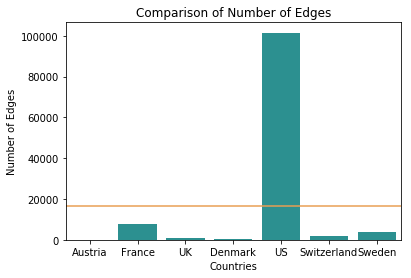

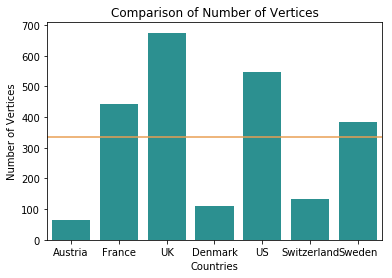

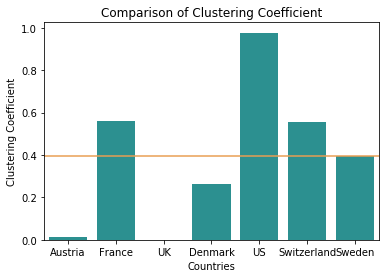

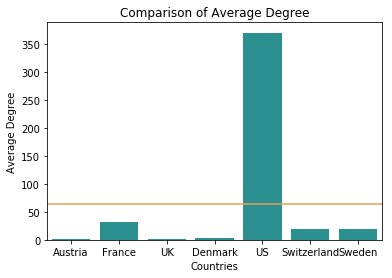

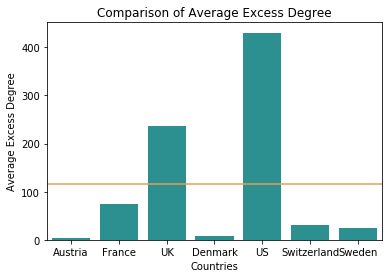

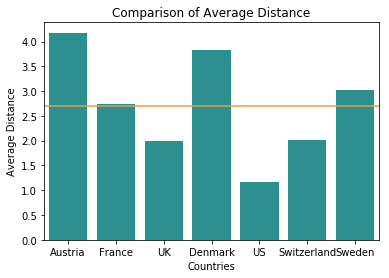

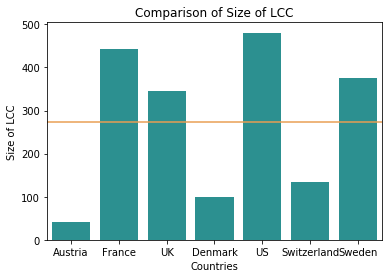

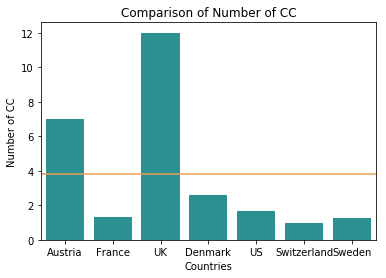

In [4]:
# For each feature, create a plot where x-axis = Countries, y-axis = Features

for count, x in enumerate(all_data.index):
    plt.figure()
    data = all_data.iloc[[count]]
    mean = float(data.mean(axis=1))
    plot = sns.barplot(data = data, ci = None, color = "#1ca0a0")
    plt.axhline(y=mean,color='#e99e52')
    trend = list(all_data.index.values)[count]
    title = "Comparison of " + trend
    plt.title(title)
    plt.ylabel(trend)
    plt.xlabel("Countries")
    
    # Save Figure
    save_path = 'plots/averages/' + trend
    fig = plot.get_figure()
    fig.savefig(save_path)

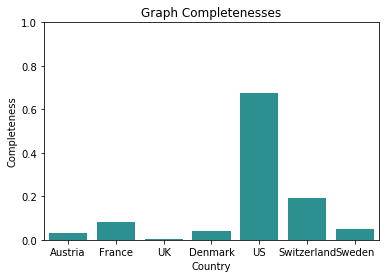

In [6]:
plt.figure()
edges = pd.DataFrame(all_data.loc[['Number of Vertices', 'Number of Edges']]).transpose()
edges['Complete Number of Edges'] = edges['Number of Vertices'] * (edges['Number of Vertices'] - 1) / 2
edges['Completeness'] = edges['Number of Edges'] / edges['Complete Number of Edges']
edges.index.rename('Country', inplace=True); edges.reset_index(inplace=True)

sns.barplot(x='Country', y='Completeness', data=edges, color='#1ca0a0')
plt.title(f'Graph Completenesses')
plt.ylim(0, 1)

# Save Figure
plt.savefig('plots/averages/completeness.png')
plt.savefig('plots/averages/completeness.pdf')